In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from pprint import pprint as pp

# CONTENTS
### read data and manipulate
- define column names
- read data file
- check for `null` values
- add column for cover name
- add columns for reversal on one-hot encoding on `wild_area` and `soil_type`
- read file with information on `soil_index`
- add data column for clustering of `soil_index` categories   
   
### data exploration
- option to plot small subset of data
- numerical features statistics
- investigate correlation between numerical features
- histogram of categorical (indexed) features
- histograms of `soil_index` clusters
- distribution of target values
- histogram of target values
- investigate histogram of each feature by target value
- investigate distribution of each feature by target value   
   
### scale numerical features
- column names
- test scaling
- apply scaling
- final check for `null` values
- investigate statistics of scaled values   
   
### pickle manipulated data

# read data and manipulate

### define column names

In [6]:
column = 'wild_area_'
areas = ['rawah', 'neota', 'comanche_peak', 'cache_la_poudre']
wild_area_cols = []
for i in areas:
    wild_area_cols.append(column + i)
#wild_area_cols

column = 'soil_type_'
soil_type_cols = []
for i in range(1,41):
    soil_type_cols.append(column + str(i))
#soil_type_cols

numerical_cols = ['elevation', 'aspect', 'slope', 'HD_hydrology', 'VD_hydrology', 'HD_roadways',
                  'hillshade_9am', 'hillshade_noon', 'hillshade_3pm', 'HD_fire_points']
#numerical_cols

target_col = ['cover_type']
target_name = ['cover_name']

cover_names = ['spruce_fir', 'lodgepole_pine', 'ponderosa_pine', 'cottonwood_willow', 'aspen', 'douglas_fir', 'krummholz']

col_names = numerical_cols + wild_area_cols + soil_type_cols + target_col
#len(col_names)
#col_names

print('wild_area_cols:')
pp(wild_area_cols)
print('\nsoil_type_cols:')
pp(soil_type_cols)
print('\ntarget_col:')
pp(target_col)
print('\ntarget_name:')
pp(target_name)
print('\ncol_names :')
pp(col_names)
print('\ncover_names :')
pp(cover_names)
print('\nlength col_names = ', len(col_names))

wild_area_cols:
['wild_area_rawah',
 'wild_area_neota',
 'wild_area_comanche_peak',
 'wild_area_cache_la_poudre']

soil_type_cols:
['soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6',
 'soil_type_7',
 'soil_type_8',
 'soil_type_9',
 'soil_type_10',
 'soil_type_11',
 'soil_type_12',
 'soil_type_13',
 'soil_type_14',
 'soil_type_15',
 'soil_type_16',
 'soil_type_17',
 'soil_type_18',
 'soil_type_19',
 'soil_type_20',
 'soil_type_21',
 'soil_type_22',
 'soil_type_23',
 'soil_type_24',
 'soil_type_25',
 'soil_type_26',
 'soil_type_27',
 'soil_type_28',
 'soil_type_29',
 'soil_type_30',
 'soil_type_31',
 'soil_type_32',
 'soil_type_33',
 'soil_type_34',
 'soil_type_35',
 'soil_type_36',
 'soil_type_37',
 'soil_type_38',
 'soil_type_39',
 'soil_type_40']

target_col:
['cover_type']

target_name:
['cover_name']

col_names :
['elevation',
 'aspect',
 'slope',
 'HD_hydrology',
 'VD_hydrology',
 'HD_roadways',
 'hillshade_9am',
 'hillshade_noon',
 'hill

### read data file

In [7]:
df_data = pd.read_csv('data/covtype.data.gz', compression='gzip', header=None, names=col_names)

In [8]:
df_data.shape
df_data.columns
df_data.head()

(581012, 55)

Index(['elevation', 'aspect', 'slope', 'HD_hydrology', 'VD_hydrology',
       'HD_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'HD_fire_points', 'wild_area_rawah', 'wild_area_neota',
       'wild_area_comanche_peak', 'wild_area_cache_la_poudre', 'soil_type_1',
       'soil_type_2', 'soil_type_3', 'soil_type_4', 'soil_type_5',
       'soil_type_6', 'soil_type_7', 'soil_type_8', 'soil_type_9',
       'soil_type_10', 'soil_type_11', 'soil_type_12', 'soil_type_13',
       'soil_type_14', 'soil_type_15', 'soil_type_16', 'soil_type_17',
       'soil_type_18', 'soil_type_19', 'soil_type_20', 'soil_type_21',
       'soil_type_22', 'soil_type_23', 'soil_type_24', 'soil_type_25',
       'soil_type_26', 'soil_type_27', 'soil_type_28', 'soil_type_29',
       'soil_type_30', 'soil_type_31', 'soil_type_32', 'soil_type_33',
       'soil_type_34', 'soil_type_35', 'soil_type_36', 'soil_type_37',
       'soil_type_38', 'soil_type_39', 'soil_type_40', 'cover_type'],
      dtype='

,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   elevation                  581012 non-null  int64
 1   aspect                     581012 non-null  int64
 2   slope                      581012 non-null  int64
 3   HD_hydrology               581012 non-null  int64
 4   VD_hydrology               581012 non-null  int64
 5   HD_roadways                581012 non-null  int64
 6   hillshade_9am              581012 non-null  int64
 7   hillshade_noon             581012 non-null  int64
 8   hillshade_3pm              581012 non-null  int64
 9   HD_fire_points             581012 non-null  int64
 10  wild_area_rawah            581012 non-null  int64
 11  wild_area_neota            581012 non-null  int64
 12  wild_area_comanche_peak    581012 non-null  int64
 13  wild_area_cache_la_poudre  581012 non-null  int64
 14  soil

### check for `null` values

In [10]:
check_null = df_data.isnull().sum()
#check_null
print('total NULL values, all rows, all columns:', check_null.sum())

total NULL values, all rows, all columns: 0


### add column for cover name

In [11]:
get_target_name_from_integer = lambda i : cover_names[i-1]
get_target_name_from_integer(2)

'lodgepole_pine'

In [12]:
df_data[target_name[0]] = df_data[target_col[0]].apply(get_target_name_from_integer)
df_data.head()
df_data.tail()

,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type,cover_name
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5,aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5,aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2,lodgepole_pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2,lodgepole_pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5,aspen


,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type,cover_name
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,3,ponderosa_pine
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,3,ponderosa_pine
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,3,ponderosa_pine
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,3,ponderosa_pine
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,3,ponderosa_pine


### add columns for reversal of one-hot encoding on `wild_area` and `soil_type`

define functions

In [13]:
reverse_one_hot_cols = ['wilderness_index', 'wilderness_area', 'soil_index']

In [14]:
def find_wilderness_index(row):
    temp = np.array(row)
    #print(type(temp))
    #print(temp)
    col_number = temp.argmax()
    return(col_number)

def find_wilderness_name(row):
    #temp = np.array(row)
    #print(type(temp))
    #print(temp)
    col_number = find_wilderness_index(row)
    col_name = wild_area_cols[col_number]
    return(col_name[10:])

In [15]:
def find_soil_index(row):
    temp = np.array(row)
    #print(type(temp))
    #print(temp)
    col_number = temp.argmax()
    return(col_number+1)

test functions

In [16]:
df_data[wild_area_cols].iloc[1]
find_wilderness_index(df_data[wild_area_cols].iloc[1])
find_wilderness_name(df_data[wild_area_cols].iloc[1])

wild_area_rawah              1
wild_area_neota              0
wild_area_comanche_peak      0
wild_area_cache_la_poudre    0
Name: 1, dtype: int64

0

'rawah'

In [17]:
df_data[wild_area_cols].iloc[10000]
find_wilderness_index(df_data[wild_area_cols].iloc[10000])
find_wilderness_name(df_data[wild_area_cols].iloc[10000])

wild_area_rawah              0
wild_area_neota              0
wild_area_comanche_peak      1
wild_area_cache_la_poudre    0
Name: 10000, dtype: int64

2

'comanche_peak'

In [18]:
df_data[soil_type_cols].iloc[1]
find_soil_index(df_data[soil_type_cols].iloc[1])

soil_type_1     0
soil_type_2     0
soil_type_3     0
soil_type_4     0
soil_type_5     0
soil_type_6     0
soil_type_7     0
soil_type_8     0
soil_type_9     0
soil_type_10    0
soil_type_11    0
soil_type_12    0
soil_type_13    0
soil_type_14    0
soil_type_15    0
soil_type_16    0
soil_type_17    0
soil_type_18    0
soil_type_19    0
soil_type_20    0
soil_type_21    0
soil_type_22    0
soil_type_23    0
soil_type_24    0
soil_type_25    0
soil_type_26    0
soil_type_27    0
soil_type_28    0
soil_type_29    1
soil_type_30    0
soil_type_31    0
soil_type_32    0
soil_type_33    0
soil_type_34    0
soil_type_35    0
soil_type_36    0
soil_type_37    0
soil_type_38    0
soil_type_39    0
soil_type_40    0
Name: 1, dtype: int64

29

In [19]:
df_data[soil_type_cols].iloc[10000]
find_soil_index(df_data[soil_type_cols].iloc[10000])

soil_type_1     0
soil_type_2     0
soil_type_3     0
soil_type_4     0
soil_type_5     0
soil_type_6     0
soil_type_7     0
soil_type_8     0
soil_type_9     0
soil_type_10    0
soil_type_11    0
soil_type_12    0
soil_type_13    0
soil_type_14    0
soil_type_15    0
soil_type_16    0
soil_type_17    0
soil_type_18    0
soil_type_19    0
soil_type_20    0
soil_type_21    0
soil_type_22    0
soil_type_23    0
soil_type_24    0
soil_type_25    0
soil_type_26    0
soil_type_27    0
soil_type_28    0
soil_type_29    0
soil_type_30    0
soil_type_31    0
soil_type_32    0
soil_type_33    0
soil_type_34    0
soil_type_35    1
soil_type_36    0
soil_type_37    0
soil_type_38    0
soil_type_39    0
soil_type_40    0
Name: 10000, dtype: int64

35

In [20]:
data_small = df_data[10000:10005].copy()

data_small['wilderness_index'] = data_small[wild_area_cols].apply(find_wilderness_index, axis=1)
data_small['wilderness_area']  = data_small[wild_area_cols].apply(find_wilderness_name,  axis=1)
data_small['soil_index']       = data_small[soil_type_cols].apply(find_soil_index,       axis=1)
data_small.head()

,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type,cover_name,wilderness_index,wilderness_area,soil_index
10000,3346,325,11,30,5,2620,191,227,176,649,...,0,0,0,0,0,7,krummholz,2,comanche_peak,35
10001,3351,354,11,60,10,2592,202,221,157,633,...,0,0,0,0,0,7,krummholz,2,comanche_peak,35
10002,3350,354,11,192,53,2348,201,220,157,543,...,0,0,0,1,0,7,krummholz,2,comanche_peak,39
10003,3347,109,33,60,44,1831,254,182,27,764,...,0,0,0,0,1,7,krummholz,2,comanche_peak,40
10004,3325,101,35,30,22,1806,252,170,15,785,...,0,0,0,0,1,7,krummholz,2,comanche_peak,40


In [21]:
check_null_new_cols = data_small[reverse_one_hot_cols].isnull().sum()
check_null_new_cols

wilderness_index    0
wilderness_area     0
soil_index          0
dtype: int64

apply functions

In [22]:
df_data['wilderness_index'] = df_data[wild_area_cols].apply(find_wilderness_index, axis=1)
df_data['wilderness_area']  = df_data[wild_area_cols].apply(find_wilderness_name,  axis=1)
df_data['soil_index']       = df_data[soil_type_cols].apply(find_soil_index,       axis=1)
df_data.head()
df_data.tail()

,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type,cover_name,wilderness_index,wilderness_area,soil_index
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,5,aspen,0,rawah,29
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,5,aspen,0,rawah,29
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,2,lodgepole_pine,0,rawah,12
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,2,lodgepole_pine,0,rawah,30
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,5,aspen,0,rawah,29


,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type,cover_name,wilderness_index,wilderness_area,soil_index
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,3,ponderosa_pine,2,comanche_peak,2
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,3,ponderosa_pine,2,comanche_peak,2
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,3,ponderosa_pine,2,comanche_peak,2
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,3,ponderosa_pine,2,comanche_peak,2
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,3,ponderosa_pine,2,comanche_peak,2


check new columns for NULL values

In [23]:
check_null_new_cols = df_data[reverse_one_hot_cols].isnull().sum()
check_null_new_cols

wilderness_index    0
wilderness_area     0
soil_index          0
dtype: int64

### read file with information on `soil_index`

In [24]:
df_soil = pd.read_pickle('data/wrangled_soil_type.pkl')
df_soil = df_soil.rename(columns={'study_code':'soil_index'})
df_soil['climatic_zone'] = df_soil['climatic_zone'].astype('int64')
df_soil['geologic_zone'] = df_soil['geologic_zone'].astype('int64')
df_soil['both_zones']    = df_soil['both_zones'].astype('int64')

df_soil.dtypes
df_soil

soil_index        int64
USFS_ELU_code    object
description      object
climatic_zone     int64
geologic_zone     int64
both_zones        int64
dtype: object

,soil_index,USFS_ELU_code,description,climatic_zone,geologic_zone,both_zones
0,1,2702,"Cathedral family - Rock outcrop complex, extre...",2,7,27
1,2,2703,"Vanet - Ratake families complex, very stony.",2,7,27
2,3,2704,"Haploborolis - Rock outcrop complex, rubbly.",2,7,27
3,4,2705,"Ratake family - Rock outcrop complex, rubbly.",2,7,27
4,5,2706,"Vanet family - Rock outcrop complex complex, r...",2,7,27
5,6,2717,Vanet - Wetmore families - Rock outcrop comple...,2,7,27
6,7,3501,Gothic family.,3,5,35
7,8,3502,Supervisor - Limber families complex.,3,5,35
8,9,4201,"Troutville family, very stony.",4,2,42
9,10,4703,Bullwark - Catamount families - Rock outcrop c...,4,7,47


### add data column for clustering of `soil_index` categories

In [25]:
soil_cols_to_use = ['soil_index', 'climatic_zone', 'geologic_zone', 'both_zones']
df_data = pd.merge(df_data, df_soil[soil_cols_to_use], how='left', left_on='soil_index', right_on='soil_index')

In [26]:
df_data.columns
df_data.dtypes
df_data.head()
df_data.tail()

Index(['elevation', 'aspect', 'slope', 'HD_hydrology', 'VD_hydrology',
       'HD_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'HD_fire_points', 'wild_area_rawah', 'wild_area_neota',
       'wild_area_comanche_peak', 'wild_area_cache_la_poudre', 'soil_type_1',
       'soil_type_2', 'soil_type_3', 'soil_type_4', 'soil_type_5',
       'soil_type_6', 'soil_type_7', 'soil_type_8', 'soil_type_9',
       'soil_type_10', 'soil_type_11', 'soil_type_12', 'soil_type_13',
       'soil_type_14', 'soil_type_15', 'soil_type_16', 'soil_type_17',
       'soil_type_18', 'soil_type_19', 'soil_type_20', 'soil_type_21',
       'soil_type_22', 'soil_type_23', 'soil_type_24', 'soil_type_25',
       'soil_type_26', 'soil_type_27', 'soil_type_28', 'soil_type_29',
       'soil_type_30', 'soil_type_31', 'soil_type_32', 'soil_type_33',
       'soil_type_34', 'soil_type_35', 'soil_type_36', 'soil_type_37',
       'soil_type_38', 'soil_type_39', 'soil_type_40', 'cover_type',
       'cover_

elevation           int64
aspect              int64
slope               int64
HD_hydrology        int64
VD_hydrology        int64
                    ...  
wilderness_area    object
soil_index          int64
climatic_zone       int64
geologic_zone       int64
both_zones          int64
Length: 62, dtype: object

,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,soil_type_39,soil_type_40,cover_type,cover_name,wilderness_index,wilderness_area,soil_index,climatic_zone,geologic_zone,both_zones
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,5,aspen,0,rawah,29,7,7,77
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,5,aspen,0,rawah,29,7,7,77
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,2,lodgepole_pine,0,rawah,12,4,7,47
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,2,lodgepole_pine,0,rawah,30,7,7,77
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,5,aspen,0,rawah,29,7,7,77


,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,soil_type_39,soil_type_40,cover_type,cover_name,wilderness_index,wilderness_area,soil_index,climatic_zone,geologic_zone,both_zones
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,3,ponderosa_pine,2,comanche_peak,2,2,7,27
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,3,ponderosa_pine,2,comanche_peak,2,2,7,27
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,3,ponderosa_pine,2,comanche_peak,2,2,7,27
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,3,ponderosa_pine,2,comanche_peak,2,2,7,27
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,3,ponderosa_pine,2,comanche_peak,2,2,7,27


In [27]:
check_null_new_cols = df_data[soil_cols_to_use].isnull().sum()
check_null_new_cols

soil_index       0
climatic_zone    0
geologic_zone    0
both_zones       0
dtype: int64

# data exploration
https://www.tutorialspoint.com/seaborn/seaborn_facet_grid.htm

### option to plot small subset of data

In [28]:
num_rows = 10000
data_small = df_data[:num_rows]
#plot_subset = True
plot_subset = False

if plot_subset:
    plot_data = data_small
else:
    plot_data = df_data

### numerical features statistics

In [29]:
df_data[numerical_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
HD_hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
VD_hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
HD_roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
hillshade_noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
HD_fire_points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


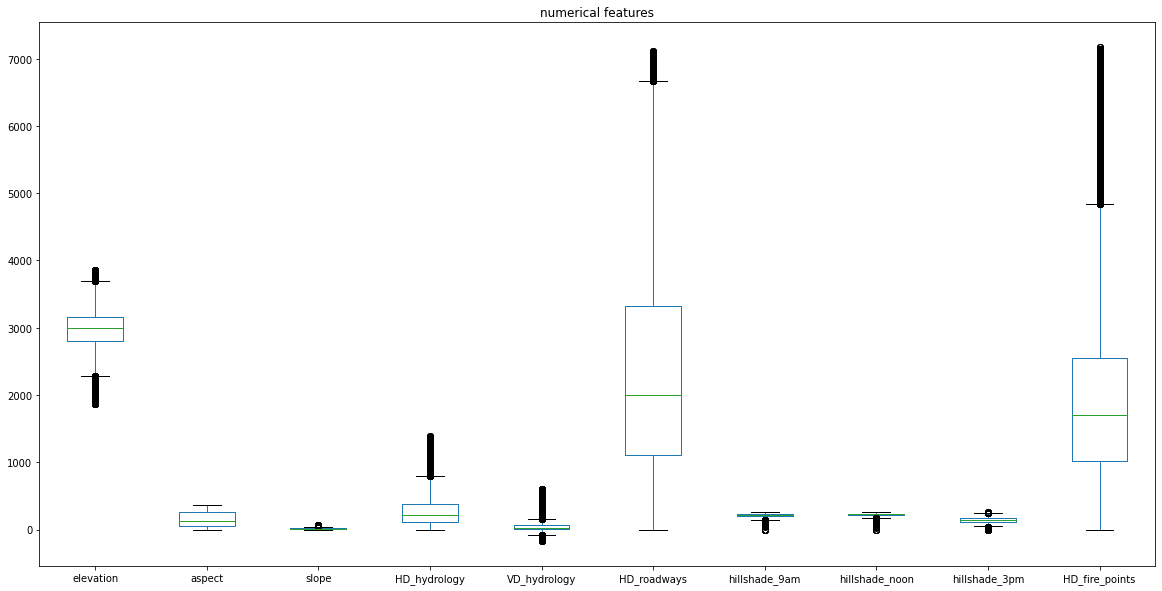

In [30]:
_ = plot_data[numerical_cols].plot(kind='box', figsize=(20,10));
_ = plt.title('numerical features');

### investigate correlation between numerical features

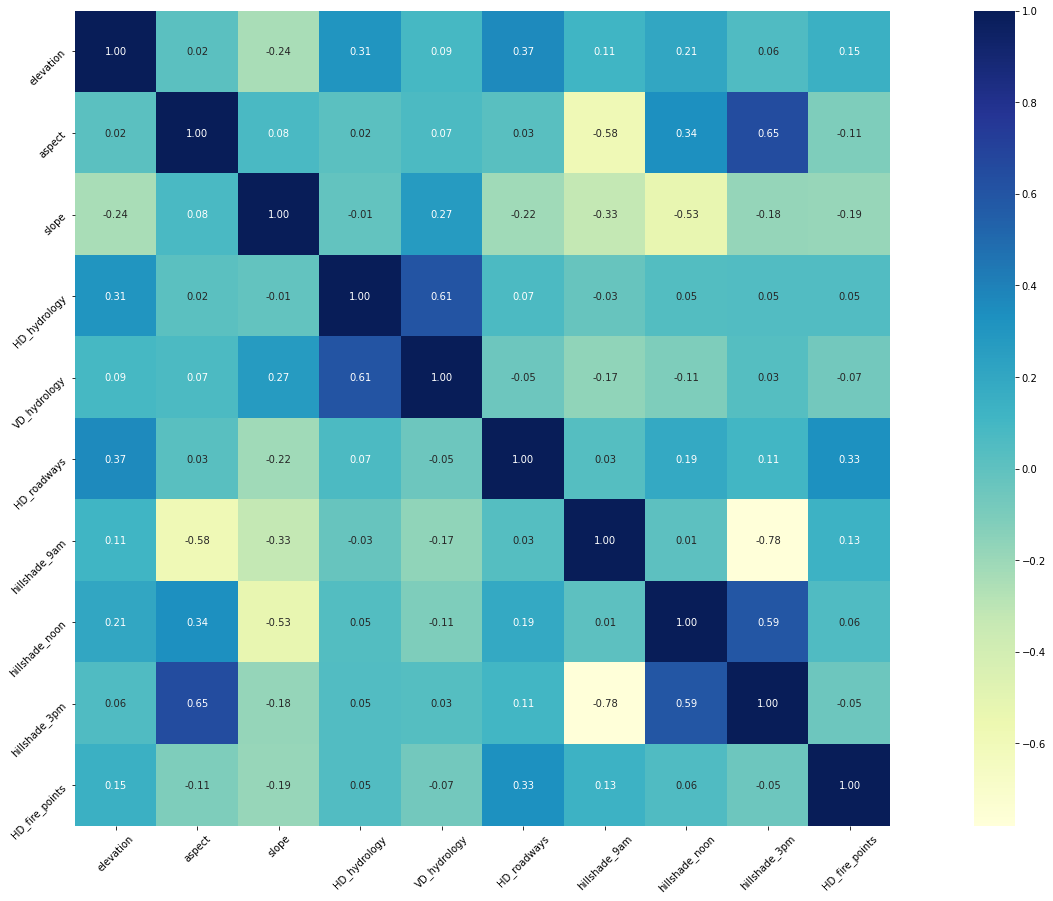

In [31]:
cor_matrix = plot_data[numerical_cols].corr()
_ = plt.figure(figsize=(30,15));
g = sns.heatmap(cor_matrix, square=True, annot=True, fmt='.2f', cmap='YlGnBu');
_ = g.set_xticklabels(numerical_cols, rotation=45);
_ = g.set_yticklabels(numerical_cols, rotation=45);

### histograms of categorical (indexed) features

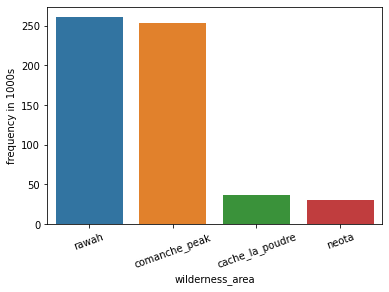

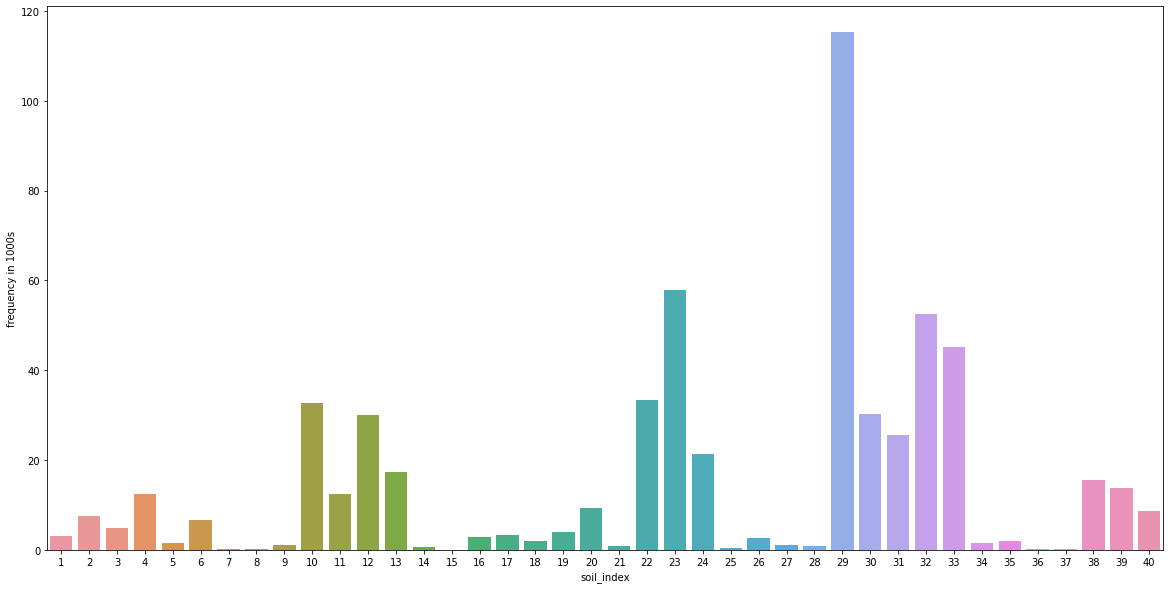

In [32]:
#for feature in ['wilderness_index', 'soil_index']:
for feature in ['wilderness_area', 'soil_index']:
    counts = plot_data[feature].value_counts()
    
    if feature == 'wilderness_area':
        _   = plt.figure();
        _   = plt.xticks(rotation=20)
    else:
        _   = plt.figure(figsize=(20,10));
    
    bar = sns.barplot(x=counts.index, y=(counts.values)/1000)
    _   = bar.set_xlabel(feature)
    _   = bar.set_ylabel('frequency in 1000s')

### histograms of `soil_index` clusters

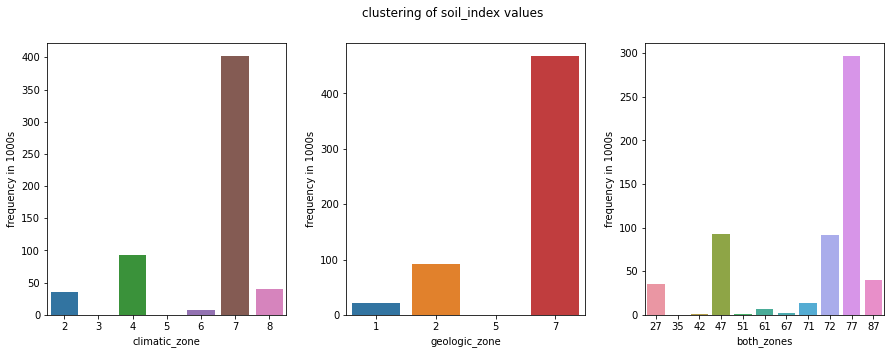

In [33]:
soil_cluster_cols = ['climatic_zone', 'geologic_zone', 'both_zones']

fig, ax = plt.subplots(1, 3)
_ = plt.subplots_adjust(wspace=0.25)
_ = fig.set_figheight(5)
_ = fig.set_figwidth(15)
_ = fig.suptitle('clustering of soil_index values')
#_ = fig.tight_layout(h_pad=1.2)

for i in range(len(soil_cluster_cols)):
    #print(i, soil_cluster_cols[i])
    feature = soil_cluster_cols[i]
    counts = plot_data[feature].value_counts().sort_index()
    
    bar = sns.barplot(x=counts.index, y=(counts.values)/1000, ax=ax[i])
    _   = bar.set_xlabel(feature)
    _   = bar.set_ylabel('frequency in 1000s')

### distribution of target values

In [34]:
df_target_counts = pd.DataFrame(df_data[target_name].value_counts(), columns=['count'])
df_target_counts['fraction'] = df_target_counts['count'] / len(df_data)
df_target_counts

,count,fraction
cover_name,,
lodgepole_pine,283301,0.487599
spruce_fir,211840,0.364605
ponderosa_pine,35754,0.061537
krummholz,20510,0.035300
douglas_fir,17367,0.029891
aspen,9493,0.016339
cottonwood_willow,2747,0.004728


### histogram of target values

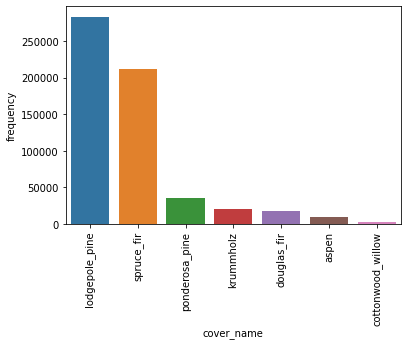

In [35]:
for feature in target_name:
    counts = plot_data[feature].value_counts()
    _   = plt.figure();
    bar = sns.barplot(x=counts.index, y=counts.values)
    _   = bar.set_xlabel(feature)
    _   = plt.xticks(rotation=90);
    _   = bar.set_ylabel('frequency')

### investigate histogram of each feature by target value

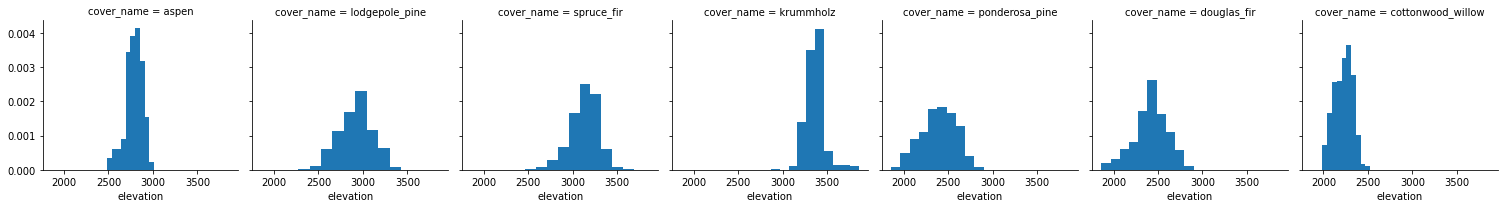

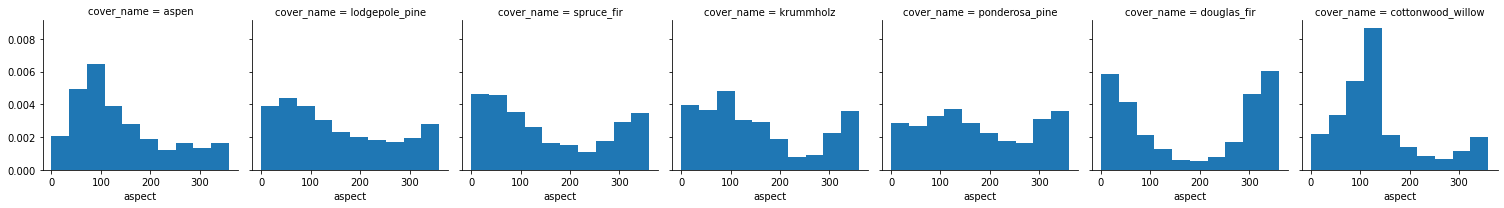

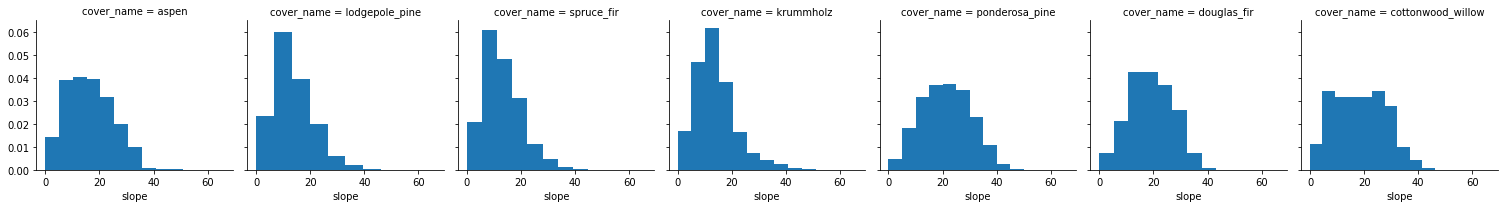

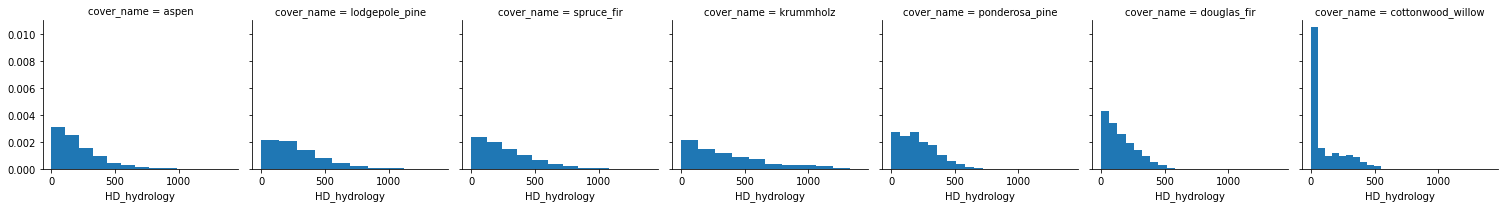

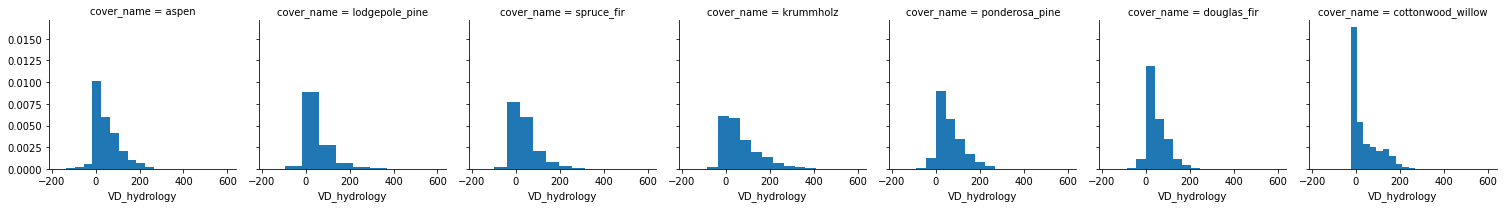

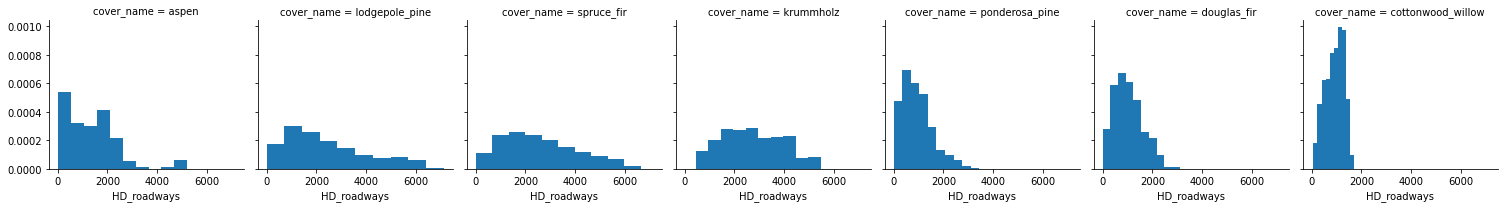

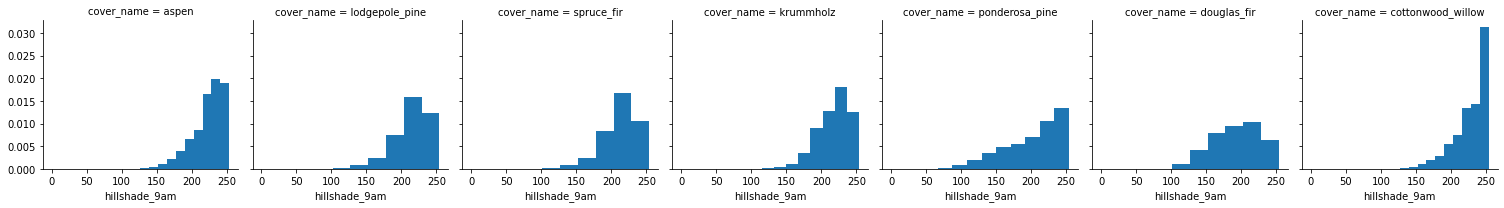

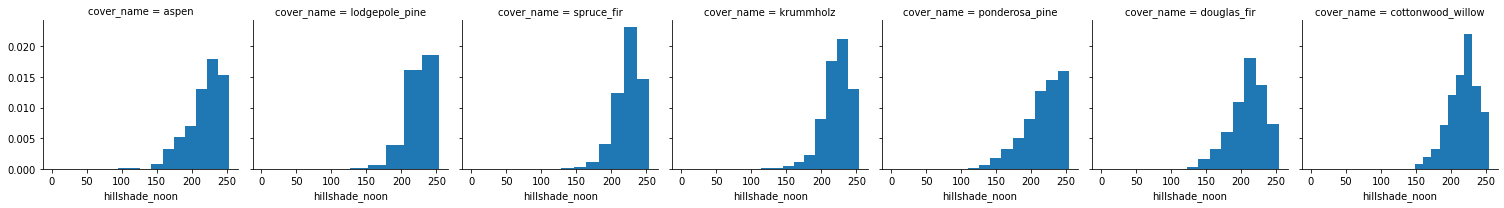

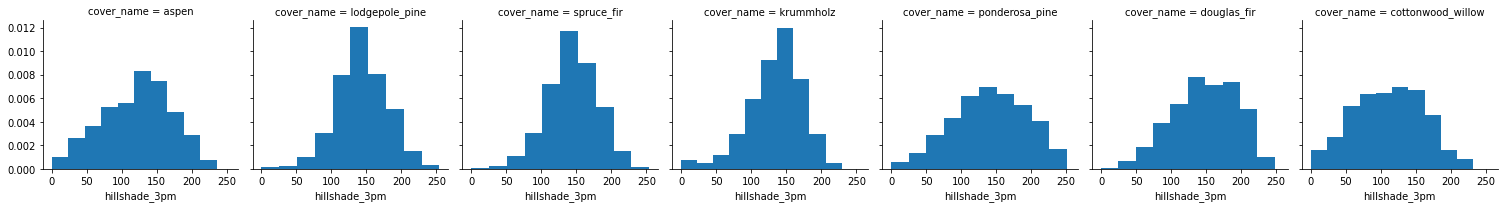

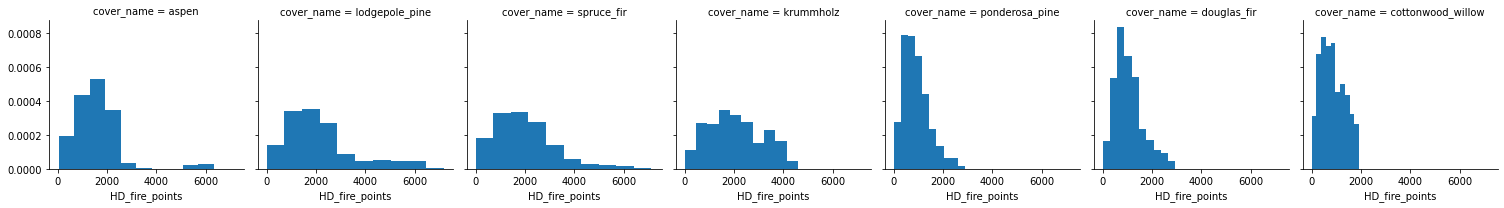

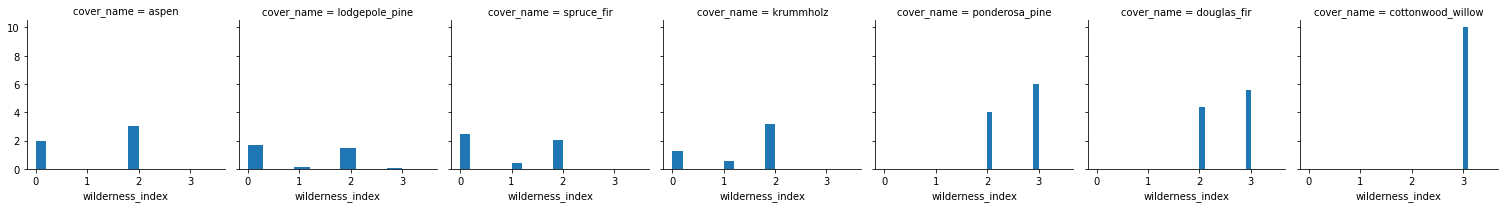

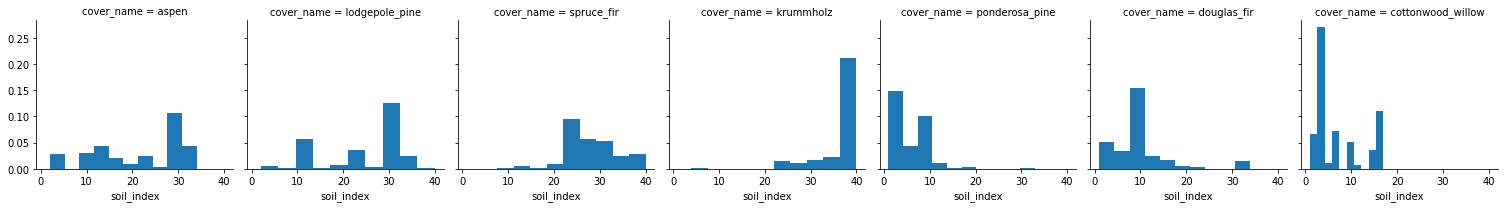

In [36]:
for feature in numerical_cols + ['wilderness_index', 'soil_index']:
    g = sns.FacetGrid(plot_data, col=target_name[0]);
    _ = g.map(plt.hist, feature, density=True);
    _ = plt.show();

### investigate distribution of each feature by target value

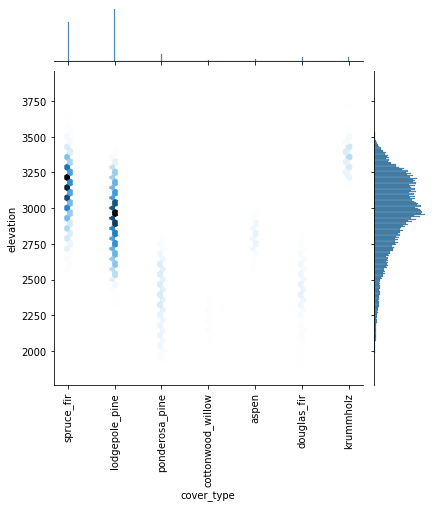

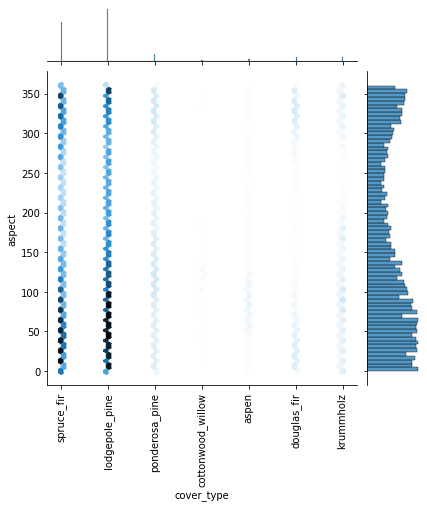

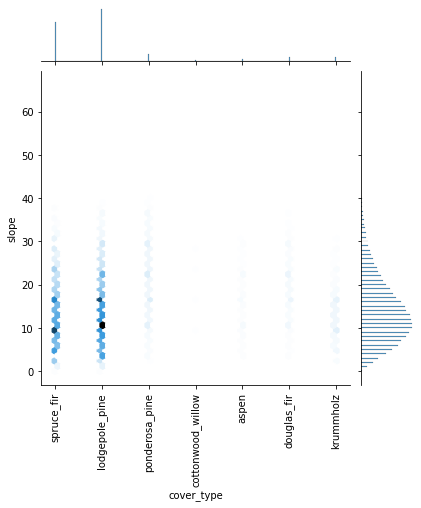

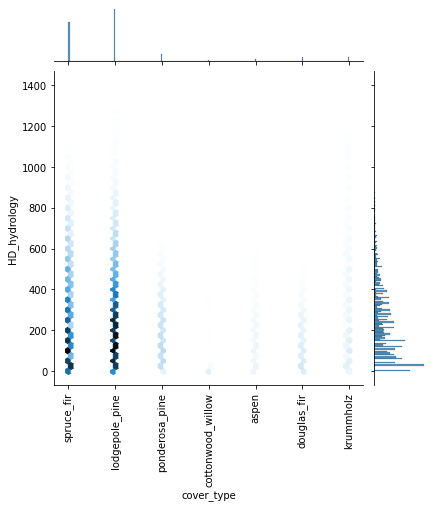

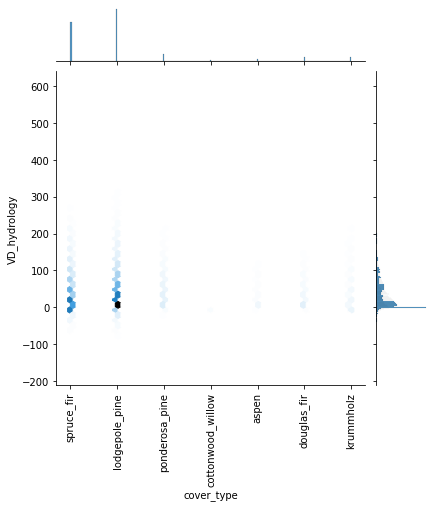

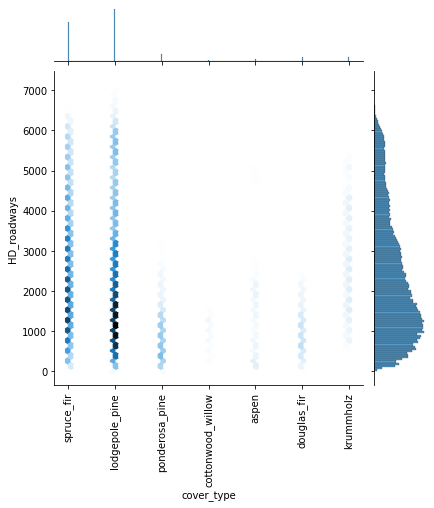

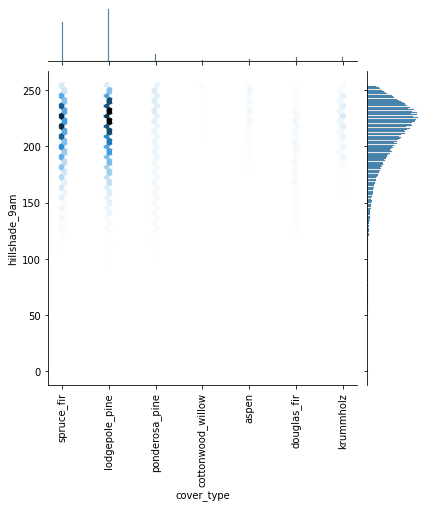

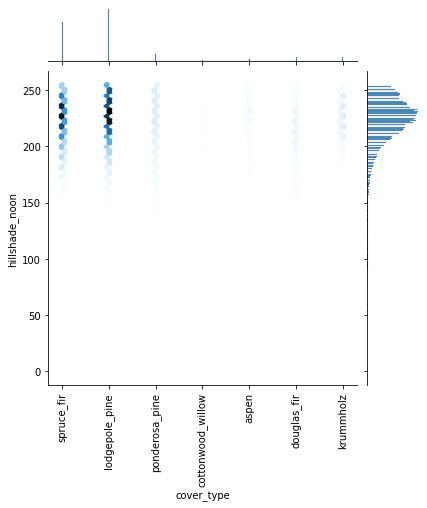

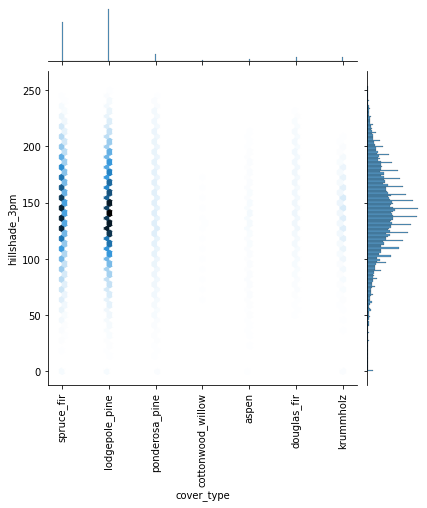

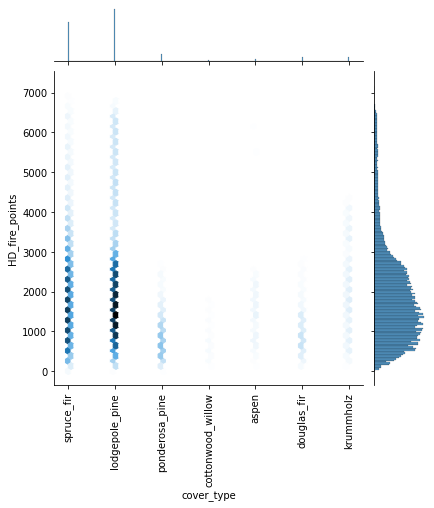

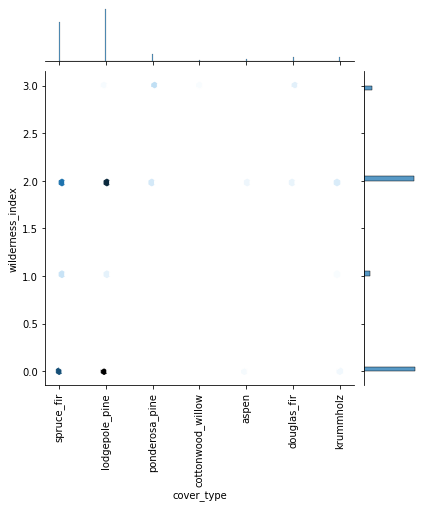

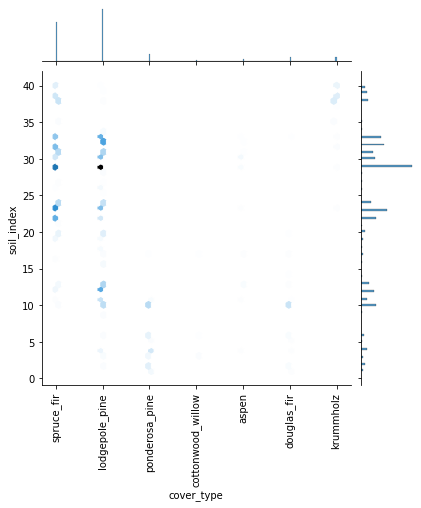

In [37]:
for feature in numerical_cols  + ['wilderness_index', 'soil_index']:
    jp = sns.jointplot(x=target_col[0], y=feature, data = plot_data, kind='hex');
    ax = jp.ax_joint;
    _  = ax.set_xticks([1,2,3,4,5,6,7]);
    _  = ax.set_xticklabels(cover_names, rotation=90)
    _  = plt.show();

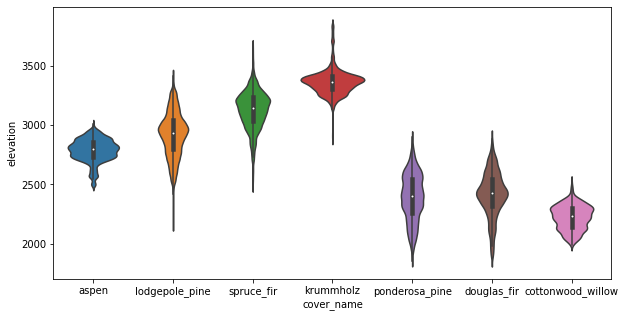

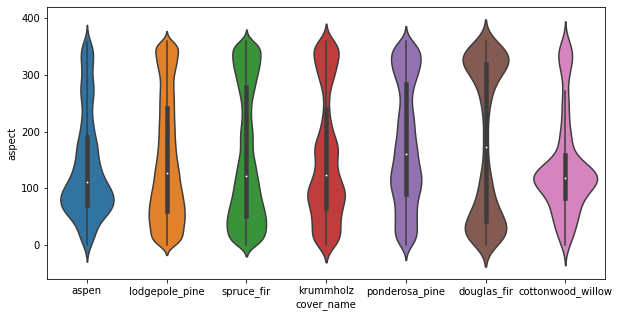

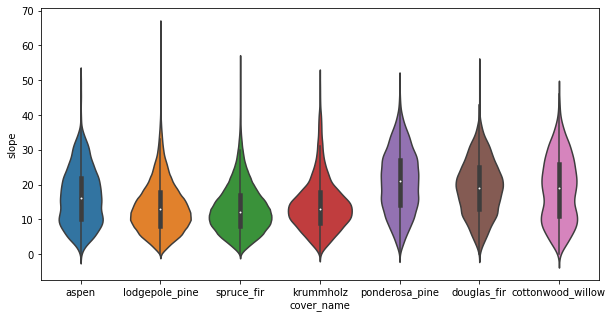

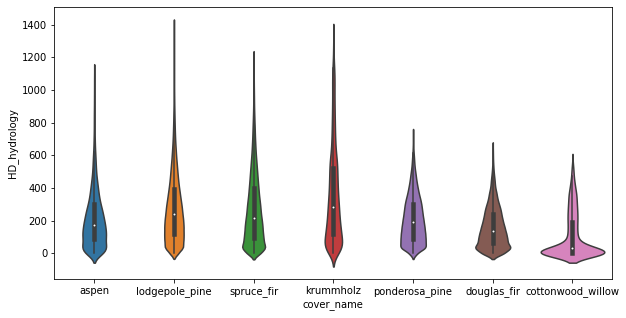

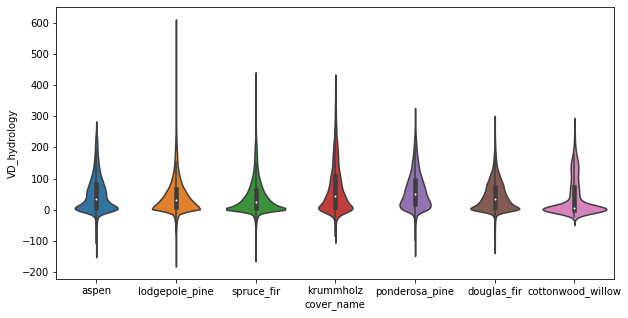

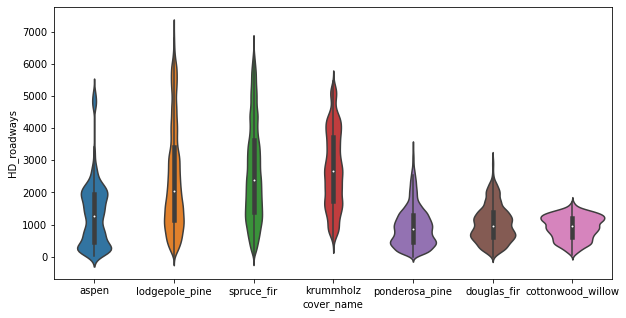

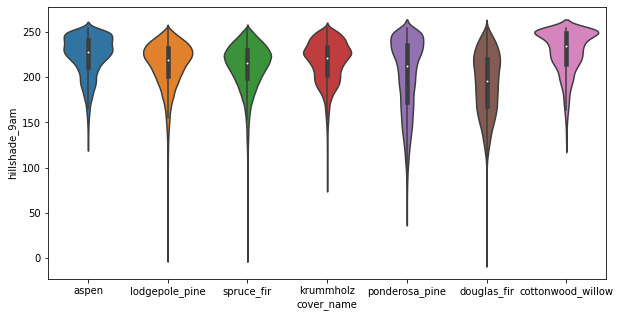

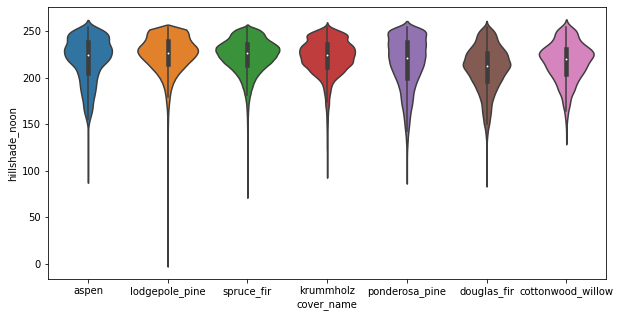

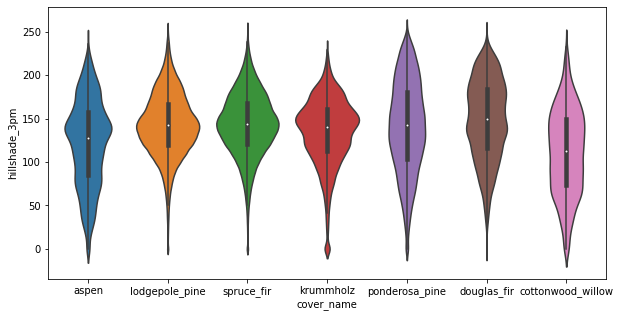

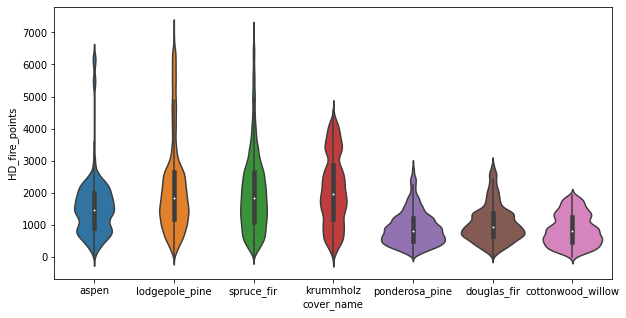

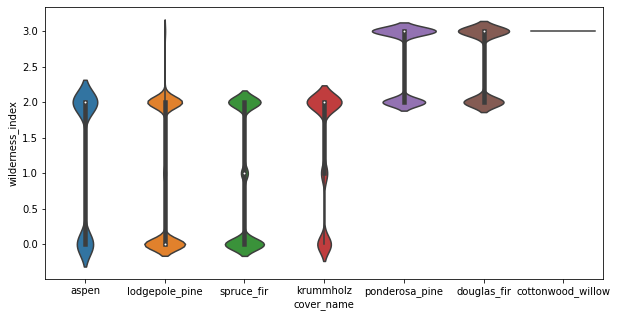

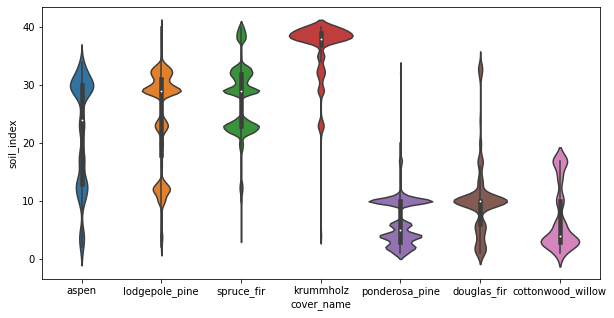

In [38]:
for feature in numerical_cols + ['wilderness_index', 'soil_index']:
    _ = plt.subplots(figsize=(10,5))
    _ = sns.violinplot(data=plot_data, x=target_name[0], y=feature)
    _ = plt.show()

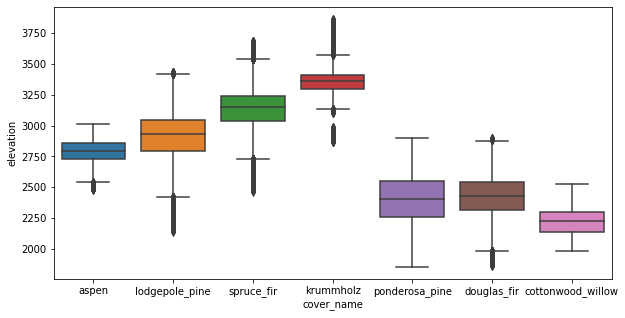

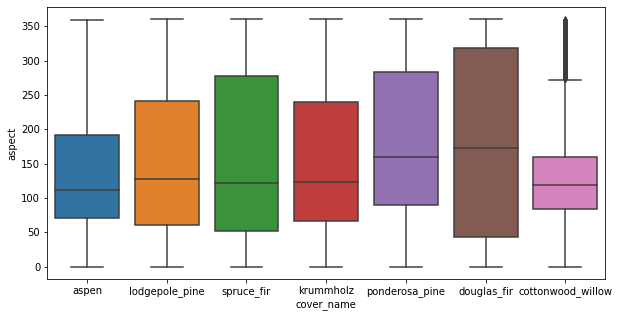

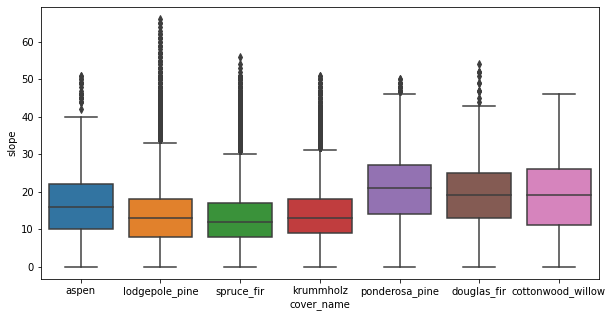

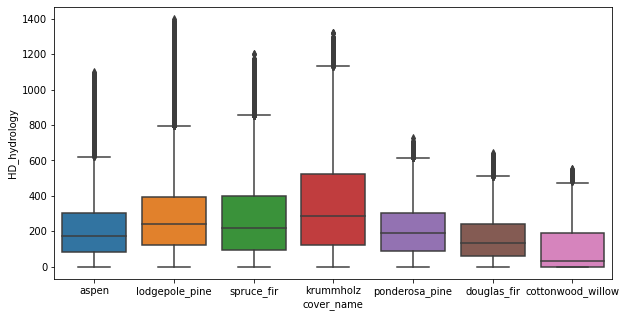

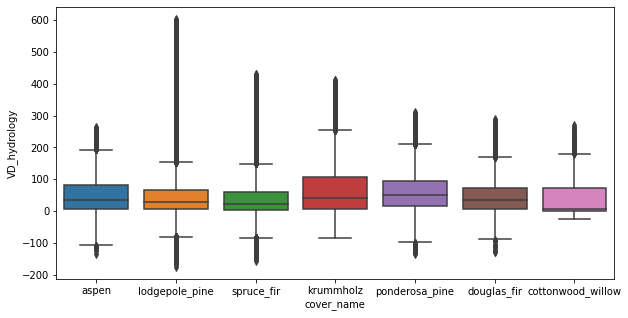

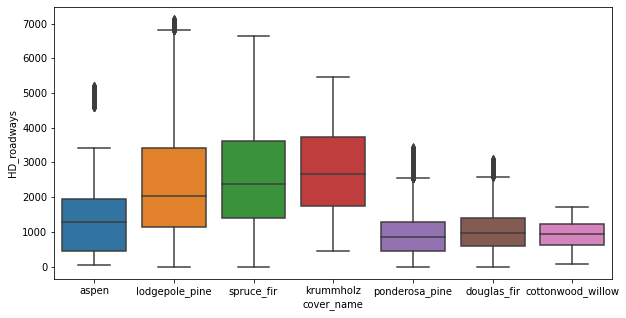

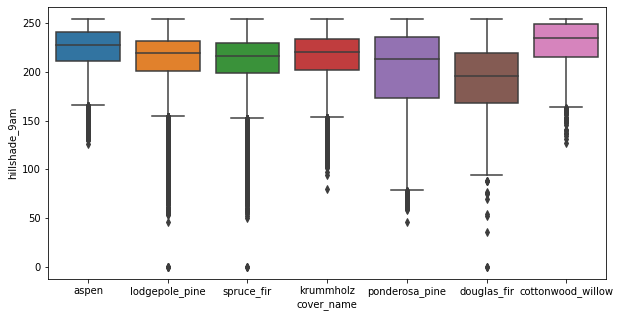

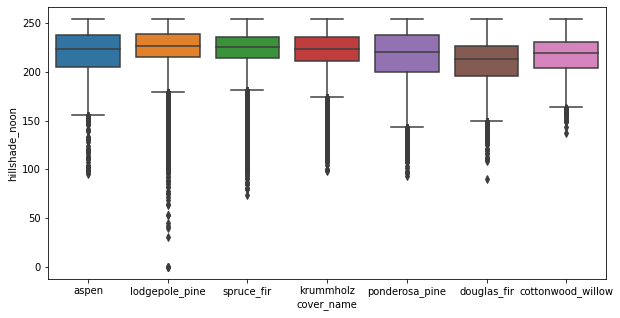

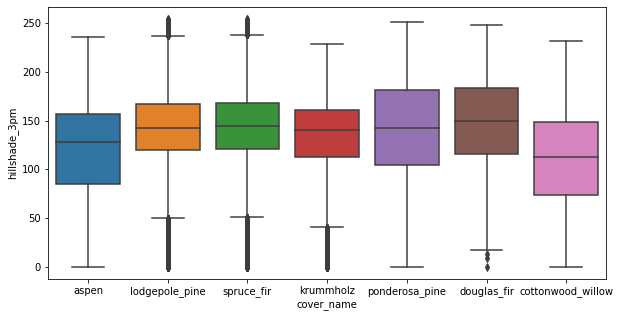

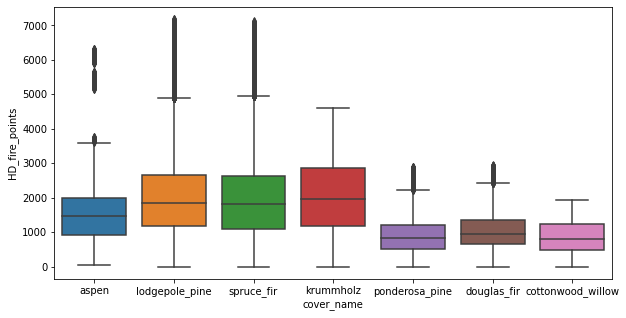

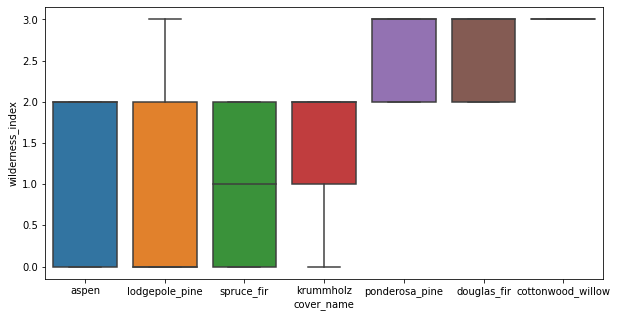

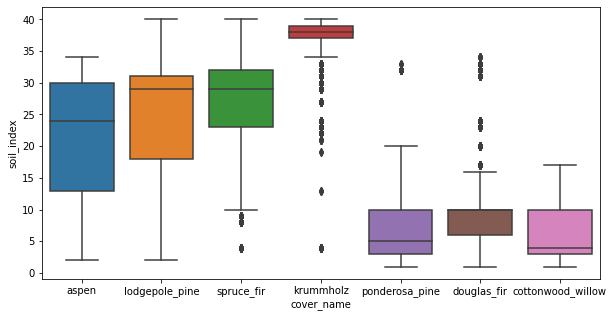

In [39]:
for feature in numerical_cols + ['wilderness_index', 'soil_index']:
    _ = plt.subplots(figsize=(10,5))
    _ = sns.boxplot(data=plot_data, x=target_name[0], y=feature)
    _ = plt.show()

# scale numerical features

### column names

In [40]:
numerical_cols

['elevation',
 'aspect',
 'slope',
 'HD_hydrology',
 'VD_hydrology',
 'HD_roadways',
 'hillshade_9am',
 'hillshade_noon',
 'hillshade_3pm',
 'HD_fire_points']

In [41]:
scaled_cols = []
for col in numerical_cols:
    scaled_cols.append('mms_' + col)
scaled_cols

['mms_elevation',
 'mms_aspect',
 'mms_slope',
 'mms_HD_hydrology',
 'mms_VD_hydrology',
 'mms_HD_roadways',
 'mms_hillshade_9am',
 'mms_hillshade_noon',
 'mms_hillshade_3pm',
 'mms_HD_fire_points']

### test scaling

In [42]:
data_small = df_data[:1000].copy()

scaler = MinMaxScaler()
temp = pd.DataFrame(scaler.fit_transform(data_small[numerical_cols]), columns=scaled_cols)
temp.head()
data_small = pd.concat([data_small, temp], axis=1)
data_small.head()

,mms_elevation,mms_aspect,mms_slope,mms_HD_hydrology,mms_VD_hydrology,mms_HD_roadways,mms_hillshade_9am,mms_hillshade_noon,mms_hillshade_3pm,mms_HD_fire_points
0,0.140845,0.142061,0.051282,0.258776,0.155172,0.064927,0.762590,0.805310,0.566038,0.914748
1,0.133163,0.155989,0.025641,0.212638,0.134483,0.047340,0.755396,0.831858,0.580189,0.906728
2,0.407170,0.387187,0.205128,0.268806,0.379310,0.456251,0.856115,0.858407,0.504717,0.891282
3,0.382843,0.431755,0.435897,0.242728,0.562069,0.443060,0.884892,0.858407,0.443396,0.904649
4,0.139565,0.125348,0.025641,0.153460,0.151724,0.047486,0.755396,0.823009,0.575472,0.898856


,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,mms_elevation,mms_aspect,mms_slope,mms_HD_hydrology,mms_VD_hydrology,mms_HD_roadways,mms_hillshade_9am,mms_hillshade_noon,mms_hillshade_3pm,mms_HD_fire_points
0,2596,51,3,258,0,510,221,232,148,6279,...,0.140845,0.142061,0.051282,0.258776,0.155172,0.064927,0.762590,0.805310,0.566038,0.914748
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.133163,0.155989,0.025641,0.212638,0.134483,0.047340,0.755396,0.831858,0.580189,0.906728
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.407170,0.387187,0.205128,0.268806,0.379310,0.456251,0.856115,0.858407,0.504717,0.891282
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.382843,0.431755,0.435897,0.242728,0.562069,0.443060,0.884892,0.858407,0.443396,0.904649
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.139565,0.125348,0.025641,0.153460,0.151724,0.047486,0.755396,0.823009,0.575472,0.898856


### apply scaling

In [43]:
scaler = MinMaxScaler()

temp = pd.DataFrame(scaler.fit_transform(df_data[numerical_cols]), columns=scaled_cols)
df_data_scaled = pd.concat([df_data, temp], axis=1)
df_data_scaled.head()

,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,mms_elevation,mms_aspect,mms_slope,mms_HD_hydrology,mms_VD_hydrology,mms_HD_roadways,mms_hillshade_9am,mms_hillshade_noon,mms_hillshade_3pm,mms_HD_fire_points
0,2596,51,3,258,0,510,221,232,148,6279,...,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449


### final check for `null` values

In [44]:
check_null = df_data_scaled.isnull().sum()
#check_null
print('total NULL values, all rows, all columns:', check_null.sum())

total NULL values, all rows, all columns: 0


### investigate statistics of scaled values

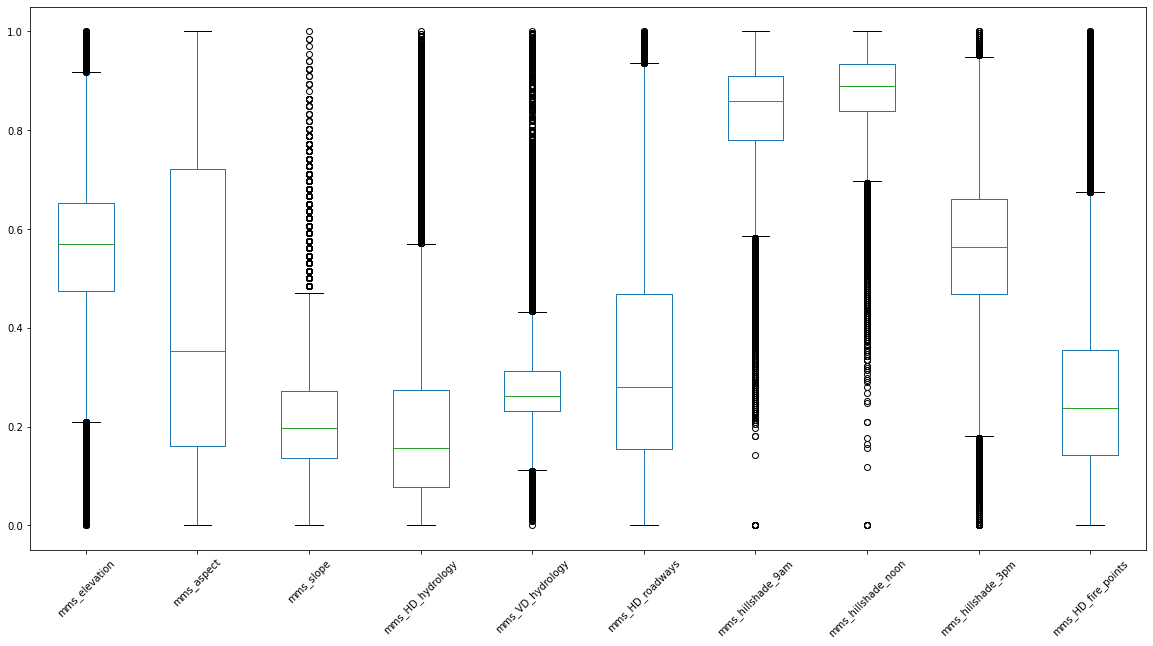

In [45]:
#num_rows = 10000
#data_small = df_data_scaled[:num_rows]
df_data_scaled[scaled_cols].plot(kind='box', figsize=(20,10), rot=45);

# pickle manipulated data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html

In [46]:
df_data_scaled.columns

Index(['elevation', 'aspect', 'slope', 'HD_hydrology', 'VD_hydrology',
       'HD_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'HD_fire_points', 'wild_area_rawah', 'wild_area_neota',
       'wild_area_comanche_peak', 'wild_area_cache_la_poudre', 'soil_type_1',
       'soil_type_2', 'soil_type_3', 'soil_type_4', 'soil_type_5',
       'soil_type_6', 'soil_type_7', 'soil_type_8', 'soil_type_9',
       'soil_type_10', 'soil_type_11', 'soil_type_12', 'soil_type_13',
       'soil_type_14', 'soil_type_15', 'soil_type_16', 'soil_type_17',
       'soil_type_18', 'soil_type_19', 'soil_type_20', 'soil_type_21',
       'soil_type_22', 'soil_type_23', 'soil_type_24', 'soil_type_25',
       'soil_type_26', 'soil_type_27', 'soil_type_28', 'soil_type_29',
       'soil_type_30', 'soil_type_31', 'soil_type_32', 'soil_type_33',
       'soil_type_34', 'soil_type_35', 'soil_type_36', 'soil_type_37',
       'soil_type_38', 'soil_type_39', 'soil_type_40', 'cover_type',
       'cover_

In [47]:
df_data_scaled[target_name].head()

,cover_name
0,aspen
1,aspen
2,lodgepole_pine
3,lodgepole_pine
4,aspen


In [48]:
df_data_scaled.drop(columns=target_name, inplace=True)
df_data_scaled.columns

Index(['elevation', 'aspect', 'slope', 'HD_hydrology', 'VD_hydrology',
       'HD_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'HD_fire_points', 'wild_area_rawah', 'wild_area_neota',
       'wild_area_comanche_peak', 'wild_area_cache_la_poudre', 'soil_type_1',
       'soil_type_2', 'soil_type_3', 'soil_type_4', 'soil_type_5',
       'soil_type_6', 'soil_type_7', 'soil_type_8', 'soil_type_9',
       'soil_type_10', 'soil_type_11', 'soil_type_12', 'soil_type_13',
       'soil_type_14', 'soil_type_15', 'soil_type_16', 'soil_type_17',
       'soil_type_18', 'soil_type_19', 'soil_type_20', 'soil_type_21',
       'soil_type_22', 'soil_type_23', 'soil_type_24', 'soil_type_25',
       'soil_type_26', 'soil_type_27', 'soil_type_28', 'soil_type_29',
       'soil_type_30', 'soil_type_31', 'soil_type_32', 'soil_type_33',
       'soil_type_34', 'soil_type_35', 'soil_type_36', 'soil_type_37',
       'soil_type_38', 'soil_type_39', 'soil_type_40', 'cover_type',
       'wilder

In [49]:
df_data_scaled.to_pickle('data/wrangled_data.pkl')